<a href="https://colab.research.google.com/github/johir-bd/Machine-Learning-Project/blob/master/Openecv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving johirul.jpg to johirul (1).jpg
Original Image:


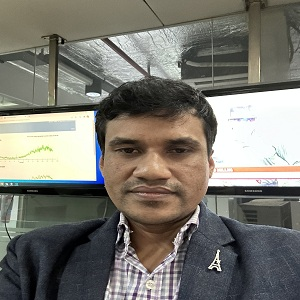

Grayscale Image:


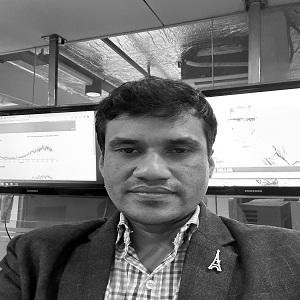

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    # Load an image from file
    image = cv2.imread(filename)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Could not load the image.")
    else:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Display the original image
        print("Original Image:")
        cv2_imshow(image)  # Use cv2_imshow for displaying images in Colab

        # Display the grayscale image
        print("Grayscale Image:")
        cv2_imshow(gray_image)  # Display grayscale image

        # Optional: Save or process further as needed

Saving johirul.jpg to johirul (2).jpg
Original Image:


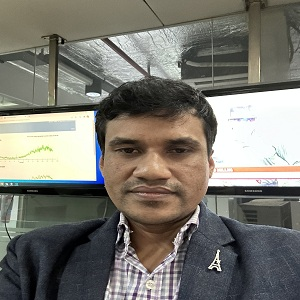

Resized Image:


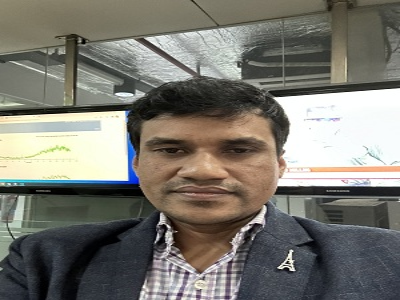

Blurred Image:


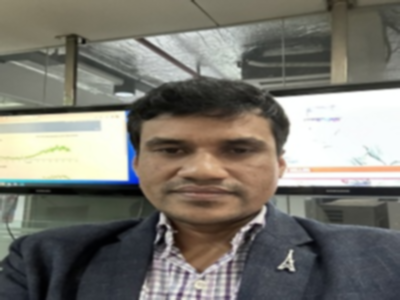

Edges Image:


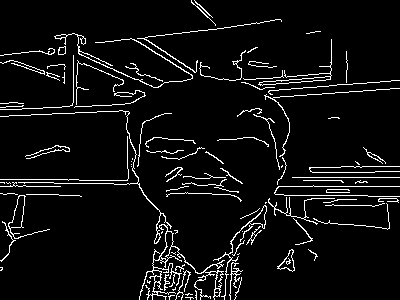

Image with Rectangle:


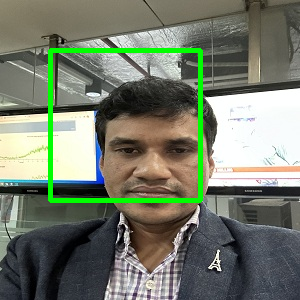

Image with Circle:


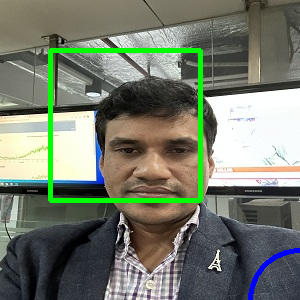

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    # Load the image from file
    image = cv2.imread(filename)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Could not load the image.")
    else:
        # Display the original image
        print("Original Image:")
        cv2_imshow(image)

        # 1. Resize the Image
        resized_image = cv2.resize(image, (400, 300))  # Resize to 400x300 pixels
        print("Resized Image:")
        cv2_imshow(resized_image)

        # 2. Apply Gaussian Blur
        blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)  # 5x5 kernel
        print("Blurred Image:")
        cv2_imshow(blurred_image)

        # 3. Edge Detection using Canny
        edges = cv2.Canny(blurred_image, 100, 200)  # Thresholds for edge detection
        print("Edges Image:")
        cv2_imshow(edges)

        # 4. Drawing Shapes on the Image
        # Drawing a rectangle
        image_with_rectangle = image.copy()
        cv2.rectangle(image_with_rectangle, (50, 50), (200, 200), (0, 255, 0), 3)  # Green rectangle
        print("Image with Rectangle:")
        cv2_imshow(image_with_rectangle)

        # Drawing a circle
        cv2.circle(image_with_rectangle, (300, 300), 50, (255, 0, 0), 3)  # Blue circle
        print("Image with Circle:")
        cv2_imshow(image_with_rectangle)

        # Optional: Save modified images
        cv2.imwrite('resized_image.jpg', resized_image)
        cv2.imwrite('blurred_image.jpg', blurred_image)
        cv2.imwrite('edges_image.jpg', edges)

Saving johirul.jpg to johirul (1).jpg


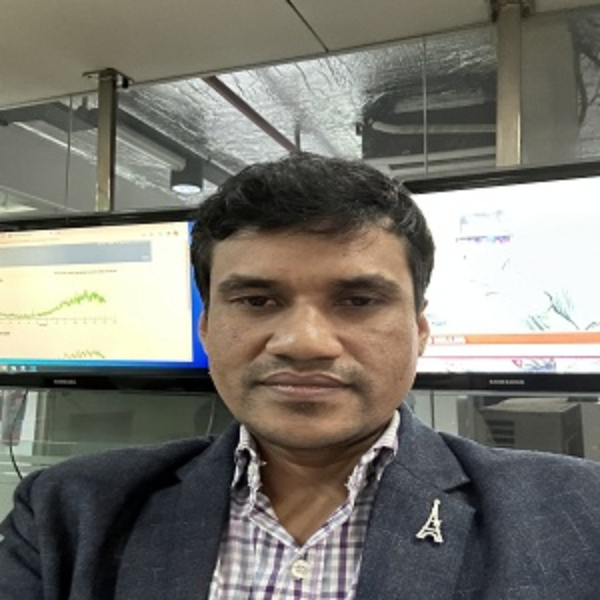

Adjusted Brightness and Contrast:


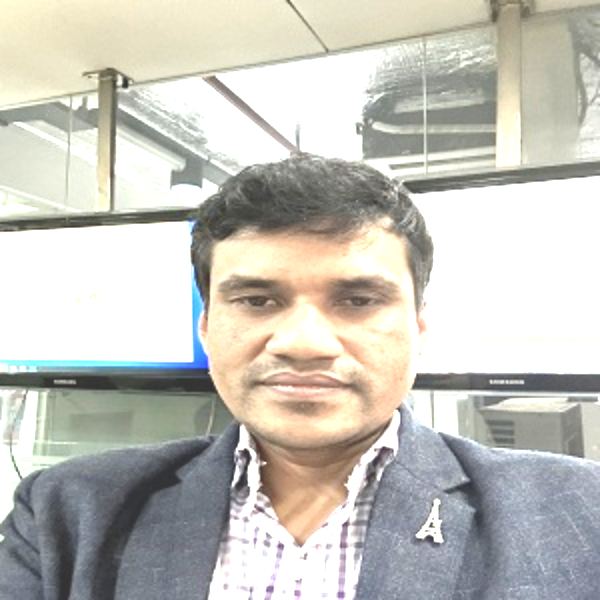

Thresholded Image:


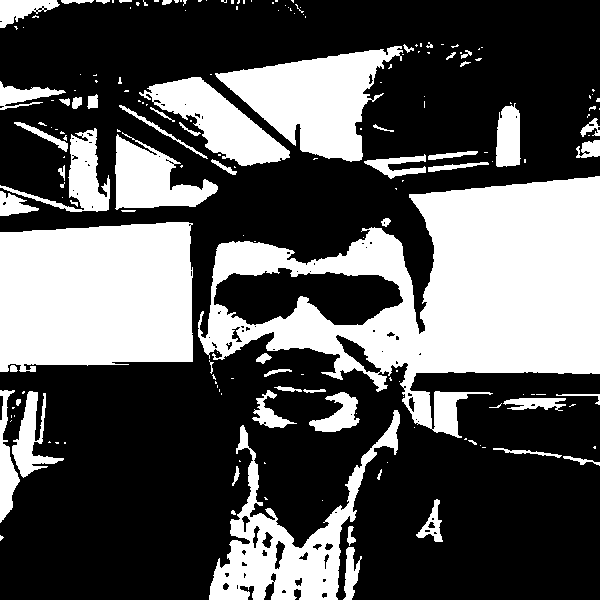

Dilated Image:


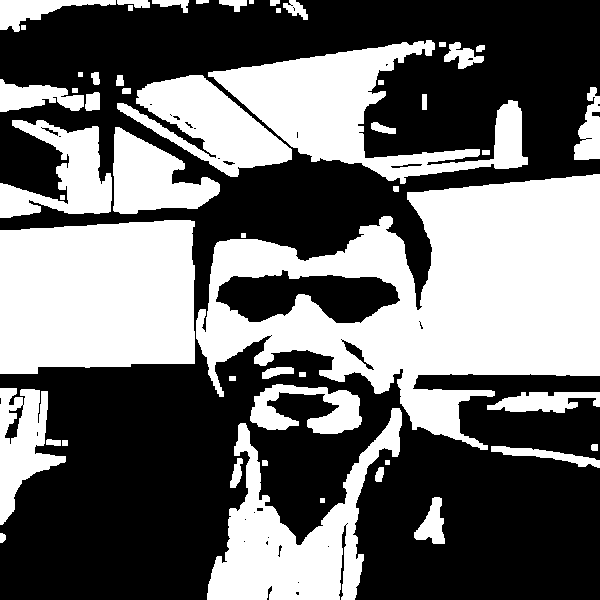

Eroded Image:


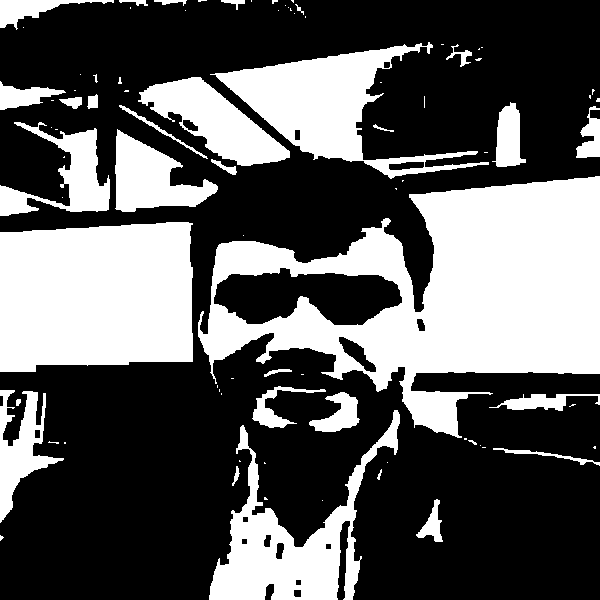

Face Detected:


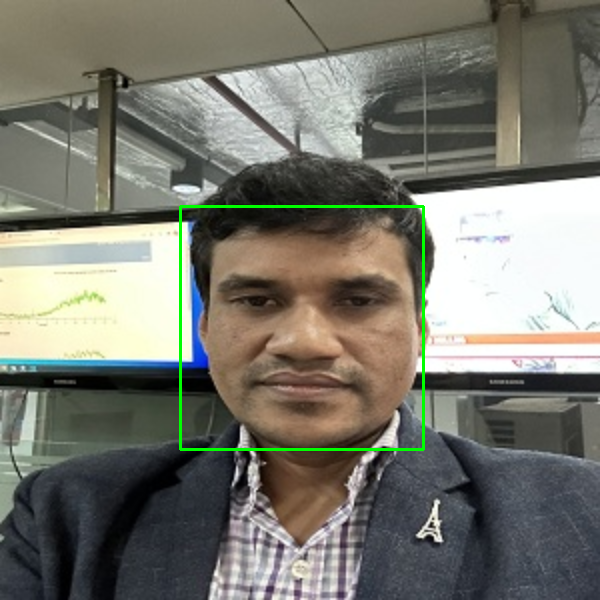

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Function to create a passport photo by cropping and resizing
def create_passport_photo(image):
    height, width = image.shape[:2]
    center_x, center_y = width // 2, height // 2
    size = min(width, height)

    crop_x_start = max(center_x - size // 2, 0)
    crop_x_end = min(center_x + size // 2, width)
    crop_y_start = max(center_y - size // 2, 0)
    crop_y_end = min(center_y + size // 2, height)

    cropped_image = image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]
    passport_photo = cv2.resize(cropped_image, (600, 600))

    return passport_photo

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, alpha, beta):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)  # Adjust brightness and contrast
    return adjusted_image

# Function to perform thresholding
def threshold_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return thresh_image

# Function for morphological transformation (dilation and erosion)
def morphological_transform(image):
    kernel = np.ones((5, 5), np.uint8)  # Define a kernel size
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return dilated_image, eroded_image

# Function for face detection
def detect_faces(image):
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle around the face
    return image

# Upload an image file
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image = cv2.imread(filename)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Could not load the image.")
    else:
        # Step 1: Create passport size photo
        passport_photo = create_passport_photo(image)
        cv2_imshow(passport_photo)

        # Step 2: Adjust brightness and contrast
        adjusted_photo = adjust_brightness_contrast(passport_photo, alpha=1.5, beta=50)  # Increase contrast and brightness
        print("Adjusted Brightness and Contrast:")
        cv2_imshow(adjusted_photo)

        # Step 3: Thresholding
        thresh_photo = threshold_image(passport_photo)
        print("Thresholded Image:")
        cv2_imshow(thresh_photo)

        # Step 4: Morphological Transformations (dilation and erosion)
        dilated_photo, eroded_photo = morphological_transform(thresh_photo)
        print("Dilated Image:")
        cv2_imshow(dilated_photo)
        print("Eroded Image:")
        cv2_imshow(eroded_photo)

        # Step 5: Face Detection
        face_detected_photo = detect_faces(passport_photo)
        print("Face Detected:")
        cv2_imshow(face_detected_photo)

        # Optional: Save the processed images
        cv2.imwrite('passport_photo_adjusted.jpg', adjusted_photo)
        cv2.imwrite('passport_photo_thresholded.jpg', thresh_photo)
        cv2.imwrite('passport_photo_dilated.jpg', dilated_photo)
        cv2.imwrite('passport_photo_eroded.jpg', eroded_photo)
        cv2.imwrite('passport_photo_face_detected.jpg', face_detected_photo)